<a href="https://colab.research.google.com/github/vyom-verma/responsive_gallery/blob/main/cancer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
df=pd.read_csv('/content/Cancer_Data.csv')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [ ]:
df.sample(10)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
7,84458202,M,13.71,20.83,90.20,577.9,0.11890,0.16450,0.093660,0.059850,...,28.14,110.60,897.0,0.16540,0.36820,0.267800,0.15560,0.3196,0.11510,NaN
440,909411,B,10.97,17.20,71.73,371.5,0.08915,0.11130,0.094570,0.036130,...,26.87,90.14,476.4,0.13910,0.40820,0.477900,0.15550,0.2540,0.09532,NaN
541,921386,B,14.47,24.99,95.81,656.4,0.08837,0.12300,0.100900,0.038900,...,31.73,113.50,808.9,0.13400,0.42020,0.404000,0.12050,0.3187,0.10230,NaN
552,924084,B,12.77,29.43,81.35,507.9,0.08276,0.04234,0.019970,0.014990,...,36.00,88.10,594.7,0.12340,0.10640,0.086530,0.06498,0.2407,0.06484,NaN
478,911685,B,11.49,14.59,73.99,404.9,0.10460,0.08228,0.053080,0.019690,...,21.90,82.04,467.6,0.13520,0.20100,0.259600,0.07431,0.2941,0.09180,NaN
456,9112366,B,11.63,29.29,74.87,415.1,0.09357,0.08574,0.071600,0.020170,...,38.81,86.04,527.8,0.14060,0.20310,0.292300,0.06835,0.2884,0.07220,NaN
327,895299,B,12.03,17.93,76.09,446.0,0.07683,0.03892,0.001546,0.005592,...,22.25,82.74,523.4,0.10130,0.07390,0.007732,0.02796,0.2171,0.07037,NaN
275,8911164,B,11.89,17.36,76.20,435.6,0.12250,0.07210,0.059290,0.074040,...,18.99,79.46,472.4,0.13590,0.08368,0.071530,0.08946,0.2220,0.06033,NaN
222,8812844,B,10.18,17.53,65.12,313.1,0.10610,0.08502,0.017680,0.019150,...,22.84,71.94,375.6,0.14060,0.14400,0.065720,0.05575,0.3055,0.08797,NaN
232,88203002,B,11.22,33.81,70.79,386.8,0.07780,0.03574,0.004967,0.006434,...,41.78,78.44,470.9,0.09994,0.06885,0.023180,0.03002,0.2911,0.07307,NaN


In [ ]:
X=df.drop(columns=['id','diagnosis','Unnamed: 32'])
y=df['diagnosis']
X.shape




(569, 30)

In [ ]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
le.fit(y)


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:99: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LabelEncoder()

In [ ]:
y=le.transform(y)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:134: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


In [ ]:
y=pd.DataFrame(y)
y.sample(10)

,0
522,1
172,0
136,1
97,1
98,1
99,0
561,1
344,1
187,1
378,1


In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=1)

In [ ]:
X_train.shape

(455, 30)

In [ ]:
X_test.shape

(114, 30)

In [ ]:
y_test.shape

(114, 1)

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)

In [ ]:
X_train_scaled

array([[ 1.0449852 ,  0.29708512,  1.01044815, ...,  1.21839781,
         0.29811854,  0.08380738],
       [ 1.68141074, -1.14098169,  1.70338066, ...,  0.69716372,
        -0.88595033, -0.41234747],
       [-1.44260855, -1.12732916, -1.4504636 , ..., -1.52233766,
         0.1807324 , -0.33657109],
       ...,
       [ 0.82638686,  1.17539807,  0.86625411, ...,  1.10638475,
         0.72853438,  3.02284824],
       [-0.05077356,  0.43133503, -0.11146165, ..., -0.54050588,
        -1.1207226 , -0.44903285],
       [-0.32748032, -0.21260945, -0.39904866, ..., -0.98109057,
        -1.52732096, -1.31985978]])

In [ ]:
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

In [ ]:
model=Sequential()
model.add(Dense(30,activation='relu',input_dim=30))
model.add(Dense(10,activation='relu'))
model.add(Dense(1,activation='sigmoid'))
model.compile(optimizer='Adam', loss='binary_crossentropy',metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_9 (Dense)             (None, 30)                930       
                                                                 
 dense_10 (Dense)            (None, 10)                310       
                                                                 
 dense_11 (Dense)            (None, 1)                 11        
                                                                 
Total params: 1,251
Trainable params: 1,251
Non-trainable params: 0
_________________________________________________________________


In [ ]:
history=model.fit(X_train_scaled,y_train,epochs=50)

Epoch 1/50
15/15 [==============================] - 0s 5ms/step - loss: 0.1065 - accuracy: 0.9714
Epoch 2/50
15/15 [==============================] - 0s 3ms/step - loss: 0.0987 - accuracy: 0.9736
Epoch 3/50
15/15 [==============================] - 0s 3ms/step - loss: 0.0912 - accuracy: 0.9780
Epoch 4/50
15/15 [==============================] - 0s 3ms/step - loss: 0.0848 - accuracy: 0.9802
Epoch 5/50
15/15 [==============================] - 0s 3ms/step - loss: 0.0797 - accuracy: 0.9802
Epoch 6/50
15/15 [==============================] - 0s 2ms/step - loss: 0.0750 - accuracy: 0.9824
Epoch 7/50
15/15 [==============================] - 0s 2ms/step - loss: 0.0720 - accuracy: 0.9846
Epoch 8/50
15/15 [==============================] - 0s 2ms/step - loss: 0.0675 - accuracy: 0.9868
Epoch 9/50
15/15 [==============================] - 0s 3ms/step - loss: 0.0639 - accuracy: 0.9846
Epoch 10/50
15/15 [==============================] - 0s 2ms/step - loss: 0.0608 - accuracy: 0.9868
Epoch 11/50
15/15 [

In [ ]:
y_log=model.predict(X_test_scaled)


4/4 [==============================] - 0s 3ms/step


(array([38.,  0.,  2.,  0.,  0.,  0.,  0.,  1.,  1., 72.]),
 array([5.67030986e-17, 9.99999940e-02, 1.99999988e-01, 2.99999982e-01,
        3.99999976e-01, 4.99999970e-01, 5.99999964e-01, 6.99999928e-01,
        7.99999952e-01, 8.99999976e-01, 9.99999940e-01]),
 <BarContainer object of 10 artists>)

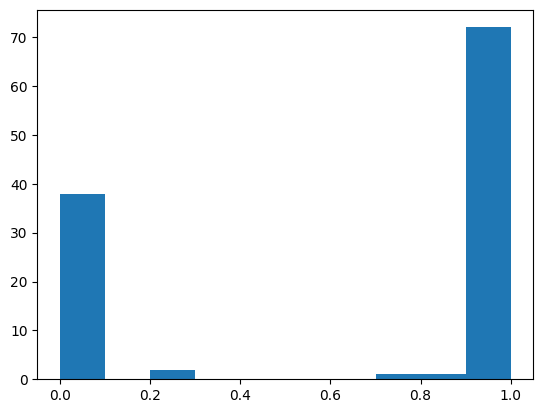

In [ ]:
import matplotlib.pyplot as plt
plt.hist(y_log)

In [ ]:
y_pred=np.where(y_log>0.5,1,0)


In [ ]:
y_test=np.array(y_test)


In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.9824561403508771